# Data Visualization Basics

*Purpose*: The most powerful way for us to learn about a dataset is to _visualize the data_. Throughout this class we will make extensive use of the _grammar of graphics_, a powerful graphical programming _grammar_ that will allow us to create just about any graph you can imagine!


## Setup


In [1]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

The following code loads a built-in dataset.


In [2]:
from grama.data import df_diamonds
df_diamonds.head(6)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


The `head()` function allows us to select the first few rows of the dataset; from the call above, we can see that the dataset has variables such as `carat`, `cut`, `color`, `clarity`, and `price`. This is a dataset of the attributes and prices of various diamonds: With these data, we can see how variables like `carat` affect the price of a diamond.

The `head()` function shows us just a few rows, while the `shape()` function will tell us how many rows and columns the dataset has.


In [3]:
df_diamonds.shape


(53940, 10)

That's nearly `54,000` rows! Inspecting that many rows would be impossible; instead, let's *visualize* the dataset to get a sense for these diamonds.


# The Grammar of Graphics

The *grammar of graphics* (ggplot) is an extremely powerful idea for making graphs. Ggplot is implemented in the Python package [plotnine](https://plotnine.readthedocs.io/en/stable/), which is available through grama.

## Fundamentals

The following code annotates a basic ggplot.

```python
(
    # Select a dataset
    df_dataset
    # Start the plot
    >> gr.ggplot(
        # Map the aesthetics to variables in df_dataset
        gr.aes(
            x="x_variable_name", 
            y="y_variable_name",
        )
    )
    # Select a geometry to visualize the aesthetics
    + gr.geom_point()
)
```

Note the special syntax: We use a pipe `>>` to "give" the dataset `df_dataset` to `gr.ggplot()`. We then use "addition" `+` to add graphical elements to the ggplot.

This will make a scatterplot of `df_dataset` with `"x_variable_name"` on the horizontal axis and `"y_variable_name"` on the vertical axis.


### __q1__ Make a simple scatterplot

Visualize the `df_diamonds` dataset with a scatterplot. Put `"price"` on the vertical axis and `"carat"` on the horizontal axis. Study the plot, and note your *observations* below.

*Hint*: Copy and modify the example code above to make this plot.


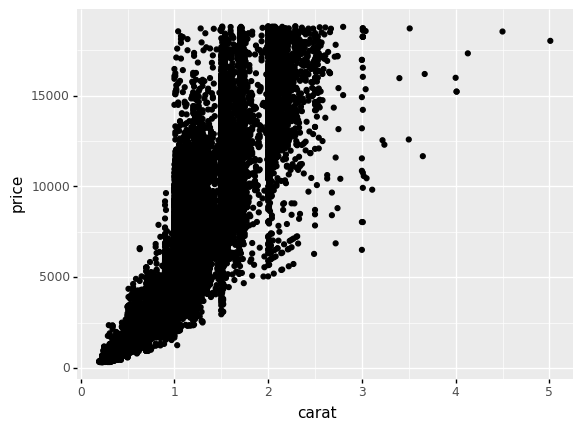

<ggplot: (8790862816278)>

In [4]:
## TASK: Visualize df_diamonds with "price" on the vertical
## and "carat" on the horizontal.
(
    df_diamonds
    >> gr.ggplot(gr.aes(x="carat", y="price"))
    + gr.geom_point()
)


*Observations*

- `price` generally increases with `carat`
- The trend is not 'clean'; there is no single curve in the relationship


## Aesthetics

The function `gr.aes()` is short for *aesthetics*. Aesthetics in ggplot are the mapping of variables in a dataframe to visual elements in the graph. For instance, in the plot above you assigned `carat` to the `x` aesthetic, and `price` to the `y` aesthetic. But there are *many more* aesthetics you can set, some of which vary based on the `geom_` you are using to visualize. 

Adding additional aesthetic mappings is done by adding additional *keyword arguments* to `gr.aes()`. For instance, the following **single line change** allows us to visualize an additional variable.

```python
(
    df_dataset
    >> gr.ggplot(
        gr.aes(
            x="x_variable_name", 
            y="y_variable_name",
            # One-line change allows us to visualize an
            # additional variable
            color="color_variable_name",
        )
    )
    + gr.geom_point()
)
```

The next question will have you apply this idea.


### __q2__ Modify and interpret

Modify the following graph to visualize an additional variable `"cut"`. Study the plot, and note your *observations* below.

*Hint*: Remember that you can add additional aesthetic mappings in `aes()`. Some options include `size`, `color`, and `shape`.


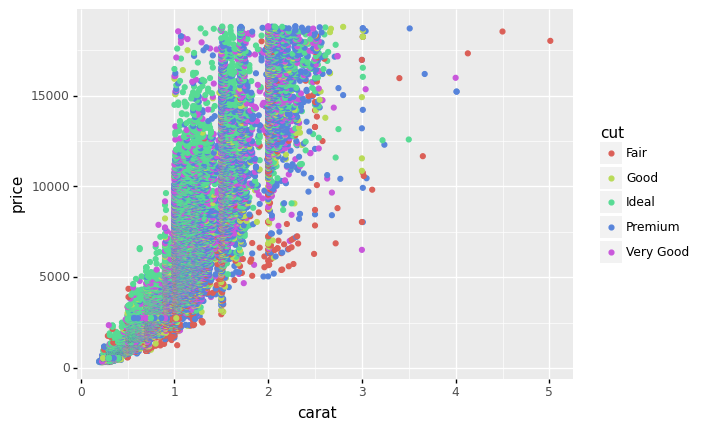

<ggplot: (8790862707706)>

In [5]:
## TASK: Modify the plot below to *also* visualize the variable "cut".
(
    df_diamonds
    >> gr.ggplot(gr.aes(
        x="carat", 
        y="price",
        color="cut",
    ))
    + gr.geom_point()
)


*Observations*

- `price` generally increases with `carat`
- The `cut` helps explain the variation in price;
  - `Ideal` cut diamonds tend to be more expensive
  - Many of the low-price diamonds have `Fair` cut


Part of the **big advantage** of ggplot is the ability to easily try out different plots. We specify the mapping from variables to aesthetics, and ggplot automatically takes care of generating the plot.


### __q3__ "Swap" aesthetics

Swap the aesthetic mappings for `"carat"` and `"cut"` and inspect the plot.


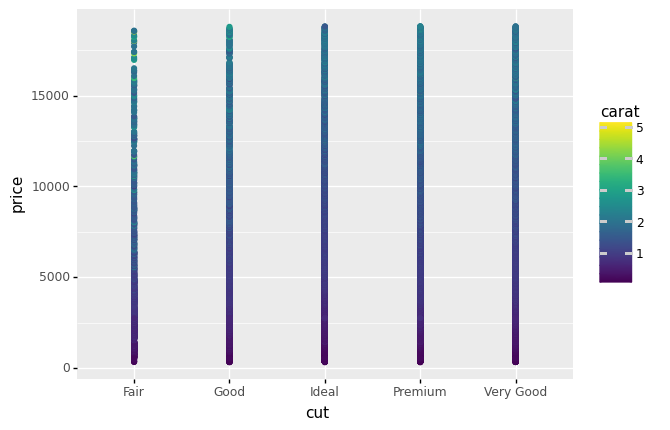

<ggplot: (8790852298090)>

In [6]:
## TASK: Swap "carat" and "cut"
(
    df_diamonds
    >> gr.ggplot(gr.aes(

        x="cut", 
        y="price",
        color="carat",
    ))
    + gr.geom_point()
)


*Observations*

- Compare this plot with the previous one; is it as effective at showing trends in the data?
  - This plot is not very effective; it's difficult to say much about the data based on this visualization.
- How difficult was it to try out this new plot? How difficult would it be to swap the variables again?
  - It was very easy to modify the plot! It would be simplicity itself to try something different.
<!-- solution-end -->

## Options

In addition to mapping variables to aesthetics, we can also *fix* aesthetics to modify the plot. This is one way we can toggle various *options* in the plot.

For instance, rather than mapping color to a variable, we can simply fix color to a single value:

```python
(
    df_dataset
    >> gr.ggplot(
        gr.aes(
            x="x_variable_name", 
            y="y_variable_name",
            # Don't map color
            # color="color_variable_name",
        )
    )
    + gr.geom_point(color="salmon")
)
```

Note that here we set the `color` keyword in the geometry `gr.geom_point()`, *not* in the aesthetic `gr.aes()`. Every aesthetic of a geometry can be set to a fixed value, or mapped to a variable. You will practice doing this in the next task.


### __q4__ Set an option

Make the points in the following plot highly transparent using the `alpha` aesthetic. Answer the questions under *observations* below.

*Note*: The `alpha` keyword argument takes values between `[0, 1]`; values of `1` are completely opaque, while values of `0` are completely transparent. Intermediate values are more or less opaque.


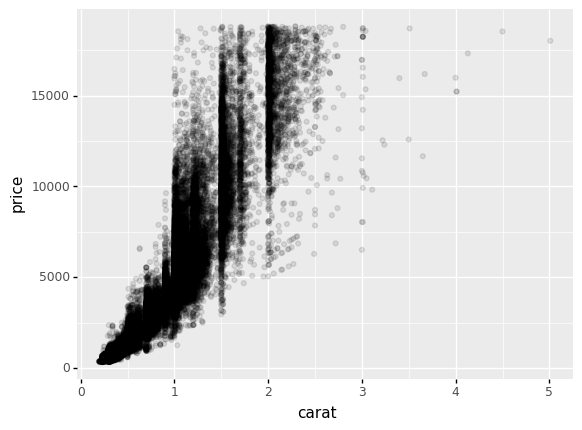

<ggplot: (8790862080287)>

In [7]:
## TASK: Modify the following visual to reduce the transparency
# of the points with the `alpha` keyword argument.
(
    df_diamonds
    >> gr.ggplot(gr.aes(x="carat", y="price"))
    + gr.geom_point(
        alpha=1/10,
    )
)


Due to the transparency, darker regions are places where there are more points, and lighter regions are plaes where there are fewer points. Keep this in mind when interpreting the graph.

*Observations*

- Where do you see more points? Where do you see fewer points?
  - There are generally more points at lower carat, with a large bulk below `carat < 1.5`. There are also concentrations of points at some select higher `carat` values.
- Do you see any strange "patterns" in the plot?
  - There are strange "vertical bands" in the data at special `carat` values; for instance, note the vertical band near `carat == 1.5` and `carat == 2.0`.
<!-- solution-end -->